In [53]:
from PIL import Image
import numpy as np
import random
from numba import jit
from matplotlib import pyplot as plt

In [54]:
k = 16

In [19]:
@jit
def calculateDistance(vToCompare,vCompareWith):
    return np.sum(np.power((vToCompare-vCompareWith),2))

In [74]:
@jit
def getBelongs(X,centroids):
    belongs = np.zeros((X.shape[0],1))
    for i in range(0,X.shape[0]):
        curr_min = 999999
        curr_k = 0
        for j in range(0,centroids.shape[0]):
            dist = calculateDistance(X[i],centroids[j])
            if(dist<curr_min):
                curr_min = dist
                curr_k = j
        
        belongs[i,:] = curr_k
    return belongs

In [21]:
@jit
def calculateCentroids(belongs,centroids,X):
    newCentroids = np.zeros((centroids.shape[0],centroids.shape[1]))
    for i in range(0,centroids.shape[0]):
        cnt = 1
        for j in range(0,belongs.shape[0]):
            if(belongs[j]==i):
                newCentroids[i] += X[j]
                cnt +=1
        newCentroids[i] /= cnt 
    return newCentroids

In [56]:
@jit
def compress(img_path ,epochs):
    img = Image.open(img_path)
    img_arr = np.asarray(img)

    x = img_arr.shape[0]
    y = img_arr.shape[1]
    z = img_arr.shape[2]
    img_arr = img_arr.reshape(x*y,z)

    m = x
    randomX = np.random.permutation(m)
    centroids = img_arr[randomX[0:k],:]
    belongs = np.zeros((img_arr.shape[0],1))
    for i in range(0,epochs):
        print(i/epochs * 100 , "%")
        belongs = getBelongs(img_arr,centroids)
        centroids = calculateCentroids(belongs,centroids,img_arr)
    return (centroids,belongs,[x,y,z])

In [69]:
def reconstruct(centroids,belongs,shape):
    new_img_arr = np.zeros((shape[0]*shape[1],shape[2]))
    for i in range(0,belongs.shape[0]):
        new_img_arr[i] = centroids[belongs[i].astype(int)]
    return  new_img_arr.reshape(shape[0],shape[1],shape[2]).astype(int)

In [51]:
def arrToImg(arr):
    plt.imshow(arr, interpolation='nearest')
    plt.show()

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


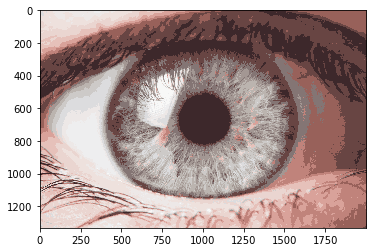

In [84]:
centroids , belongs , shape = compress("images/pupil-arrest.jpg",10)
arrToImg(reconstruct(centroids , belongs , shape))

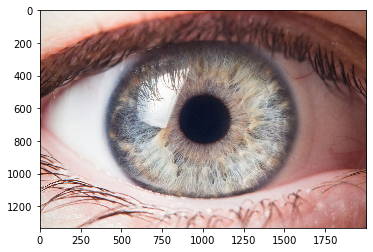

In [85]:
img = Image.open("images/pupil-arrest.jpg")
img_arr = np.asarray(img)
arrToImg(img_arr)

In [81]:
belongs.shape

(640000, 1)